Dataset created successfully. It shows a non-linear relationship.
Sample data points (X, y):
(-5.00, 7.79)
(-4.80, 3.12)
(-4.60, 4.32)
(-4.40, 7.60)
(-4.20, 6.02)

Data split: 35 training samples, 15 testing samples.
Model training complete.
Predictions made successfully.

Sample predictions:
  Actual: -1.55, Predicted: -0.52
  Actual: 8.61, Predicted: 9.10
  Actual: 2.96, Predicted: 2.78
  Actual: 14.69, Predicted: 15.08
  Actual: -2.54, Predicted: -0.76

Model Evaluation:
Mean Squared Error (MSE): 8.02
R-squared (R²): 0.80


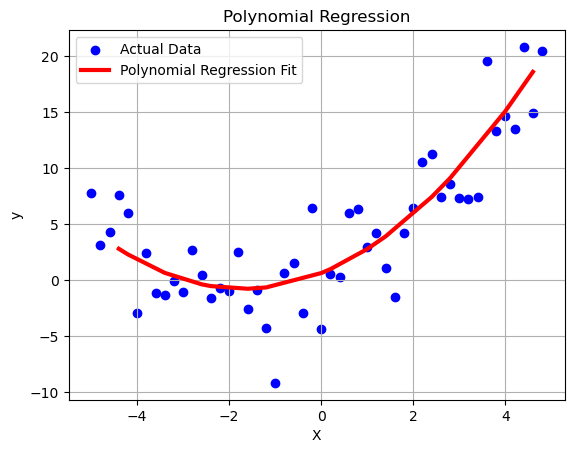


Visualization complete. The plot shows the original data points and the best-fit curve.


In [2]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Create a simulated non-linear dataset
# We'll simulate a relationship that is clearly not a straight line.
np.random.seed(0)

# Independent variable (feature): X
X = np.arange(-5, 5, 0.2).reshape(-1, 1)

# Dependent variable (target): Y, with a quadratic relationship and added noise
y = 0.5 * X**2 + 2 * X + np.random.randn(len(X), 1) * 3

print("Dataset created successfully. It shows a non-linear relationship.")
print("Sample data points (X, y):")
for i in range(5):
    print(f"({X[i][0]:.2f}, {y[i][0]:.2f})")

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nData split: {len(X_train)} training samples, {len(X_test)} testing samples.")

# 3. Create a PolynomialFeatures instance to transform the data
# We'll use a polynomial of degree 2 to match the simulated data's curve.
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# 4. Train the Linear Regression model on the transformed data
# Even though the relationship is curved, we use a Linear Regression model
# on the transformed (polynomial) features.
model = LinearRegression()
model.fit(X_train_poly, y_train)

print("Model training complete.")

# 5. Make predictions on the transformed testing data
y_pred = model.predict(X_test_poly)

print("Predictions made successfully.")
print("\nSample predictions:")
for i in range(min(5, len(y_test))):
    print(f"  Actual: {y_test[i][0]:.2f}, Predicted: {y_pred[i][0]:.2f}")

# 6. Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# 7. Visualize the results
# To plot the curved line, we need to sort the data first.
sort_axis = np.argsort(X_test.flatten())
X_test_sorted = X_test[sort_axis]
y_pred_sorted = y_pred[sort_axis]

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=3, label='Polynomial Regression Fit')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("\nVisualization complete. The plot shows the original data points and the best-fit curve.")